## 확률적 경사 하강법
> 랜덤으로 가파른 경사를 조금씩 내려감


### SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(fish_input, fish_target,random_state=42)

In [5]:
# 경사하강법은 반드시 스케일을 조정해야 함

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [7]:
from sklearn.linear_model import SGDClassifier

# 손실함수 log_loss(로지스틱 손실함수)
sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.775


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [8]:
# 기존 훈련했던 w,b를 업데이트
# 확률적 배치만 제공(사이킷런)
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [9]:
import numpy as np

sc = SGDClassifier(loss='log_loss',max_iter=10,random_state=42)

train_score=[]
test_score = []

classes = np.unique(train_target)

In [11]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

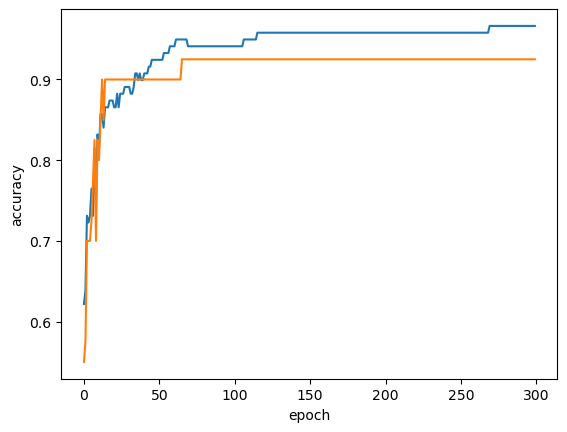

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
# max_iter = 100 : 100번 반복
# tol = None : 자동으로 멈추지 말고
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [16]:
sc = SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
